PART 1: Moving data into a dataframe and manipulating it

First, import libraries that we will use in this notebook

In [1]:
import numpy as np
import pandas as pd

In [2]:
from matplotlib import pyplot
from pandas import DataFrame

Now, we want to mount Google Drive to Colab to be able to read data from the CSV file

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Use unix ls command to make sure that the file we will load is on MyDrive

In [4]:
!ls drive/MyDrive/CstatWeatherNov19.csv

drive/MyDrive/CstatWeatherNov19.csv


Insert a code cell below this one that contains code to import the csv data from the file into a dataframe df using Pandas read_csv  -- note that if you use interational charactersets, sometimes these can fail during read_csv().  Often including encoding = 'unicode_escape' in the read_csv() fixes this problem.

In [5]:
df = pd.read_csv('/content/drive/MyDrive/CstatWeatherNov19.csv')

Use info() to look at the number and types of data that we loaded into the dataframe. Here we use the "dot notation." Dot notation allows us to refer to method of the object (method is a function exclusive to a specific class/object/instance) or attribute of the instance/object.  Methods have () at the end of the name, attributes do not.  So here's the info() method for the dataframe df:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Day              30 non-null     object 
 1   high degree F    30 non-null     float64
 2   low degree F     30 non-null     float64
 3   Precip inch      30 non-null     object 
 4   Snow inch        30 non-null     int64  
 5   snow depth inch  30 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ KB


Python machine learning tools that we will use extensively operate on numeric data.  We have Day which is an object type and Precip inch (rainfall data) is currently an object type.  


Let's look at the first few rows of the dataframe:

In [7]:
df.head()

,Day,high degree F,low degree F,Precip inch,Snow inch,snow depth inch
0,11/1/2019,63.0,32.0,0,0,0
1,11/2/2019,71.1,39.0,0,0,0
2,11/3/2019,73.0,42.1,0,0,0
3,11/4/2019,80.1,53.1,0,0,0
4,11/5/2019,84.9,64.0,0,0,0


First, convert Day into a special type which will allow us to do date/time manipulations using Pandas to_datefime()

In [8]:
df['Day'] = pd.to_datetime(df['Day'], format = '%m/%d/%Y')


Now insert a cell to check the info() again

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Day              30 non-null     datetime64[ns]
 1   high degree F    30 non-null     float64       
 2   low degree F     30 non-null     float64       
 3   Precip inch      30 non-null     object        
 4   Snow inch        30 non-null     int64         
 5   snow depth inch  30 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.5+ KB


Next, Precip inch.  Look at the values for precipitation to see why they are objects.

In [10]:
df['Precip inch']

,Precip inch
0,0
1,0
2,0
3,0
4,0
5,0
6,0.11
7,0.02
8,0
9,0


The use of T for trace rainfall is causing the problem. Trace means that detectible precipitation of less than 0.005 inches were detected.  For simplicity, substitute a small number for T. Note: trace in snow depth is defined as less than 0.05 inches

In [11]:
df.loc[df['Precip inch']=='T', ['Precip inch']] = 0.005

Now, we've eliminated the Ts, but that doesn't automatically change the Dtype.  Change the Dtype to float

In [12]:
df['Precip inch'] = df['Precip inch'].astype(float, errors = 'raise')

Again, insert a cell and use info() to check the type is now numeric

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Day              30 non-null     datetime64[ns]
 1   high degree F    30 non-null     float64       
 2   low degree F     30 non-null     float64       
 3   Precip inch      30 non-null     float64       
 4   Snow inch        30 non-null     int64         
 5   snow depth inch  30 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 1.5 KB


So, look at all the cleaned data. Since this is a small dataframe we can look at it all at once.  For large datasets, use df.head() to show the first 5 rows. df.tail(7) will show the last 7 rows in the dataframe.  Experiement with these in the next few cells.  Try the entire dataframe, then the first 5 rows and the last 7 rows

In [14]:
df
#df.head()
#df.tail(7)

,Day,high degree F,low degree F,Precip inch,Snow inch,snow depth inch
0,2019-11-01,63.0,32.0,0.000,0,0
1,2019-11-02,71.1,39.0,0.000,0,0
2,2019-11-03,73.0,42.1,0.000,0,0
3,2019-11-04,80.1,53.1,0.000,0,0
4,2019-11-05,84.9,64.0,0.000,0,0
5,2019-11-06,84.9,64.0,0.000,0,0
6,2019-11-07,70.0,46.9,0.110,0,0
7,2019-11-08,54.0,45.0,0.020,0,0
8,2019-11-09,69.1,42.1,0.000,0,0
9,2019-11-10,77.0,45.0,0.000,0,0


In [15]:
#df
df.head()
#df.tail(7)

,Day,high degree F,low degree F,Precip inch,Snow inch,snow depth inch
0,2019-11-01,63.0,32.0,0.0,0,0
1,2019-11-02,71.1,39.0,0.0,0,0
2,2019-11-03,73.0,42.1,0.0,0,0
3,2019-11-04,80.1,53.1,0.0,0,0
4,2019-11-05,84.9,64.0,0.0,0,0


In [16]:
#df
#df.head()
df.tail(7)

,Day,high degree F,low degree F,Precip inch,Snow inch,snow depth inch
23,2019-11-24,72.0,39.9,0.000,0,0
24,2019-11-25,82.9,48.9,0.005,0,0
25,2019-11-26,79.0,66.0,0.000,0,0
26,2019-11-27,71.1,54.0,0.005,0,0
27,2019-11-28,63.0,53.1,0.030,0,0
28,2019-11-29,79.0,55.9,0.070,0,0
29,2019-11-30,86.0,62.1,0.005,0,0


This dataframe is quite clean.  We could do some additional things like fixing consistency of capitalization of the feature names. df.rename() would change the column names.

Instead, lets work on a dirty data example.

This file DataClean.csv is on canvas. Insert some cells that: Go get the file, make sure it is in your MyDrive directory, and read it into a dataframe named dirtydf (following what we did above for the  weather data.)

In [17]:
#verify the file exists
!ls drive/MyDrive/DataClean.csv

drive/MyDrive/DataClean.csv


In [18]:
#load file into dataframe
dirtydf = pd.read_csv('/content/drive/MyDrive/DataClean.csv')

In [19]:
#see what it looks like
dirtydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      9 non-null      object 
 1   Gage 1    9 non-null      object 
 2   Gage 2    6 non-null      float64
 3   Gage 3    8 non-null      float64
 4   Gage 4    1 non-null      float64
 5   Measurer  9 non-null      object 
dtypes: float64(3), object(3)
memory usage: 564.0+ bytes


This dataframe is a MESS.  Each feature (column) should have 9 observations or instances (rows). Let's take a look

In [20]:
dirtydf

,Date,Gage 1,Gage 2,Gage 3,Gage 4,Measurer
0,10/1/2021,14.21,17.12,11.55,NaN,Ping
1,10/2/2021,14.08,NaN,11.04,9.6,Kishav
2,10/3/2021,15.23,NaN,12.21,NaN,Bob
3,10/4/2021,14.42,17.26,11.75,NaN,Abe
4,10/5/2021,Out sick,NaN,NaN,NaN,Dr Lowe
5,10/6/2021,13.77,16331894.00,12.22,NaN,Bob
6,10/7/2021,14,17.76,13.10,NaN,Kishav
7,10/8/2021,14.1,16.88,12.90,NaN,Ping
8,10/9/2021,14.7,17.40,13.30,NaN,Abe


We can use the dataframe count method to see how many values we have in our datrframe.  NaN values are not counted in count(). Many are obviously missing.

In [21]:
dirtydf.count()

,0
Date,9
Gage 1,9
Gage 2,6
Gage 3,8
Gage 4,1
Measurer,9


First, let's fix the Date object like we did before. Insert cell below and run the cell.

In [22]:
dirtydf['Date'] = pd.to_datetime(dirtydf['Date'], format = '%m/%d/%Y')
dirtydf

,Date,Gage 1,Gage 2,Gage 3,Gage 4,Measurer
0,2021-10-01,14.21,17.12,11.55,NaN,Ping
1,2021-10-02,14.08,NaN,11.04,9.6,Kishav
2,2021-10-03,15.23,NaN,12.21,NaN,Bob
3,2021-10-04,14.42,17.26,11.75,NaN,Abe
4,2021-10-05,Out sick,NaN,NaN,NaN,Dr Lowe
5,2021-10-06,13.77,16331894.00,12.22,NaN,Bob
6,2021-10-07,14,17.76,13.10,NaN,Kishav
7,2021-10-08,14.1,16.88,12.90,NaN,Ping
8,2021-10-09,14.7,17.40,13.30,NaN,Abe


Since we have only one reading on Gage 4, doing statistical analysis will not be very useful for this column.  Let's just drop this entire column from our dataframe:

In [23]:
dirtydf = dirtydf.drop(['Gage 4'], axis=1) #many ways of specifying how to drop this column. Check out pandas documentation for others

How does it look now

In [24]:
dirtydf

,Date,Gage 1,Gage 2,Gage 3,Measurer
0,2021-10-01,14.21,17.12,11.55,Ping
1,2021-10-02,14.08,NaN,11.04,Kishav
2,2021-10-03,15.23,NaN,12.21,Bob
3,2021-10-04,14.42,17.26,11.75,Abe
4,2021-10-05,Out sick,NaN,NaN,Dr Lowe
5,2021-10-06,13.77,16331894.00,12.22,Bob
6,2021-10-07,14,17.76,13.10,Kishav
7,2021-10-08,14.1,16.88,12.90,Ping
8,2021-10-09,14.7,17.40,13.30,Abe


Let's next drop the row from the day that Dr Lowe was sick and didn't take any readings

In [25]:
dirtydf.drop([4], inplace=True) # drops index 4 (row 4) within same dataframe

In [26]:
dirtydf

,Date,Gage 1,Gage 2,Gage 3,Measurer
0,2021-10-01,14.21,17.12,11.55,Ping
1,2021-10-02,14.08,NaN,11.04,Kishav
2,2021-10-03,15.23,NaN,12.21,Bob
3,2021-10-04,14.42,17.26,11.75,Abe
5,2021-10-06,13.77,16331894.00,12.22,Bob
6,2021-10-07,14,17.76,13.10,Kishav
7,2021-10-08,14.1,16.88,12.90,Ping
8,2021-10-09,14.7,17.40,13.30,Abe


Now, let's fix those NaNs. Pandas dropna() and fillna() are very flexible. We can force the NA to a value (eg 0) or the min/max/mean/etc of that column. We can also replace it with the last valid entry. Let's try that:



In [27]:
dirtydf['Gage 2'].fillna( method ='ffill', inplace = True) # use forward fill method
dirtydf

/tmp/ipython-input-314749832.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dirtydf['Gage 2'].fillna( method ='ffill', inplace = True) # use forward fill method
/tmp/ipython-input-314749832.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dirtydf['Gage 2'].fillna( method ='ffill', inplace = True) # use forward fill method


,Date,Gage 1,Gage 2,Gage 3,Measurer
0,2021-10-01,14.21,17.12,11.55,Ping
1,2021-10-02,14.08,17.12,11.04,Kishav
2,2021-10-03,15.23,17.12,12.21,Bob
3,2021-10-04,14.42,17.26,11.75,Abe
5,2021-10-06,13.77,16331894.00,12.22,Bob
6,2021-10-07,14,17.76,13.10,Kishav
7,2021-10-08,14.1,16.88,12.90,Ping
8,2021-10-09,14.7,17.40,13.30,Abe


Lets look at info() again

In [28]:
dirtydf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 8
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      8 non-null      datetime64[ns]
 1   Gage 1    8 non-null      object        
 2   Gage 2    8 non-null      float64       
 3   Gage 3    8 non-null      float64       
 4   Measurer  8 non-null      object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 384.0+ bytes


We want all our fields to be numeric so that we can generate statistics.  Fix the Dtype of Gage 1:

In [29]:
dirtydf['Gage 1'] = pd.to_numeric(dirtydf['Gage 1'])
dirtydf

,Date,Gage 1,Gage 2,Gage 3,Measurer
0,2021-10-01,14.21,17.12,11.55,Ping
1,2021-10-02,14.08,17.12,11.04,Kishav
2,2021-10-03,15.23,17.12,12.21,Bob
3,2021-10-04,14.42,17.26,11.75,Abe
5,2021-10-06,13.77,16331894.00,12.22,Bob
6,2021-10-07,14.00,17.76,13.10,Kishav
7,2021-10-08,14.10,16.88,12.90,Ping
8,2021-10-09,14.70,17.40,13.30,Abe


For reasons that will become clearer when we do ML classification, we want to have the Measurer be categorical Dtype rather than Object. We can accomplish this with the following:

In [30]:
dirtydf["Measurer"] = dirtydf["Measurer"].astype("category")

Let's take another look at the dataframe

In [31]:
dirtydf.info()
dirtydf

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 8
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      8 non-null      datetime64[ns]
 1   Gage 1    8 non-null      float64       
 2   Gage 2    8 non-null      float64       
 3   Gage 3    8 non-null      float64       
 4   Measurer  8 non-null      category      
dtypes: category(1), datetime64[ns](1), float64(3)
memory usage: 532.0 bytes


,Date,Gage 1,Gage 2,Gage 3,Measurer
0,2021-10-01,14.21,17.12,11.55,Ping
1,2021-10-02,14.08,17.12,11.04,Kishav
2,2021-10-03,15.23,17.12,12.21,Bob
3,2021-10-04,14.42,17.26,11.75,Abe
5,2021-10-06,13.77,16331894.00,12.22,Bob
6,2021-10-07,14.00,17.76,13.10,Kishav
7,2021-10-08,14.10,16.88,12.90,Ping
8,2021-10-09,14.70,17.40,13.30,Abe


Later, we may turn the categorical feature into a numeric value.

Now, what are we going to do about the obviously erroneous reading of Gage 2 on Oct 6?

It is very obvious this is a outlier due to some error.Now let's look at that entry for Gage 2 which seems to be an error.

We will generally just use visualization techniques for this class to help us recognize outliers.  This example will be very obvious, but let's go through a set of techniques that can help with datasets with many more observations and with outliers which are not so obvious.  

First, look at a sort of the data values for the Gage 2 feature:

In [32]:
dirtydf['Gage 2'].sort_values()

,Gage 2
7,16.88
0,17.12
2,17.12
1,17.12
3,17.26
8,17.40
6,17.76
5,16331894.00


Note if there were hundreds or thousands of observations, we'd need to look at head() or tail().  Practice here by inserting a cell to print the first 3 and the last 3 entries of the sorted data

In [33]:

print(f"First 3:\n{dirtydf.head(3)}\n")
print(f"Last 3:\n{dirtydf.tail(3)}")

First 3:
        Date  Gage 1  Gage 2  Gage 3 Measurer
0 2021-10-01   14.21   17.12   11.55     Ping
1 2021-10-02   14.08   17.12   11.04   Kishav
2 2021-10-03   15.23   17.12   12.21      Bob

Last 3:
        Date  Gage 1  Gage 2  Gage 3 Measurer
6 2021-10-07    14.0   17.76    13.1   Kishav
7 2021-10-08    14.1   16.88    12.9     Ping
8 2021-10-09    14.7   17.40    13.3      Abe


Sorted features make it easier to see what may be abnormally small or large.  Another visualization technique is boxplot. Boxplots show the distribution of the data for a row or column with a box for the data from the 1st to the 3rd quartile and "wiskers" for data 1.5X the extent of the box.  For many features, data values outside the wiskers can be considered outliers. Be careful, however, with features where the data is exponential in scale. But our values are not exponential, so let's use box plot "wiskers" to guide us.  Let's start by generating a boxplot for Gage 3, which seems to have no outliers:

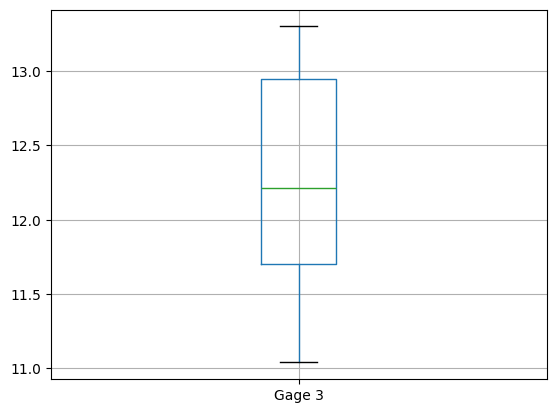

In [34]:
boxplot = dirtydf.boxplot(column=['Gage 3'])

Now repeat this for Gage 2: Insert a cell to create a boxplot for Gage 2

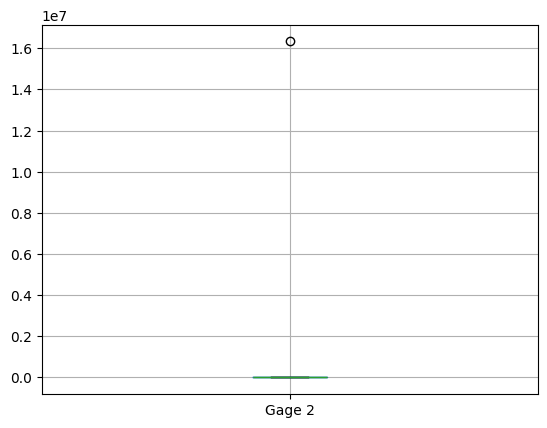

In [35]:
boxplot = dirtydf.boxplot(column=['Gage 2'])

Now this value is obviously an error. The outlier is way outside the box and wiskers, which are compressed into a single green line in this plot.  

We can (1) try to fix the error if we can determine what a likely correct value is, (2) drop the feature or the observation using dirtydf.drop(), or (3) we can replace outliers with another value 0, min, max, mean, ...

By examination it seems like two measurements, each without their decimal point were incorrectly entered for this datum.  Let's assume that the first four digits with the decimal point after the first digit is the correct reading for Gage 2 on Oct 6.

We could try to fix that by doing a replacement: dirtydf.at[index, column] = dirtydf.at[index, column] / 1000000, with the correct index and column label

However, that leaves the erroneous 4 digits at the end of the number.  An alternative would be to first do modular division on the incorrect datum to clear the last 4 digits followed by a real division to adjust the decimal point.

Insert cells to correct the datum at index 5 of feature Gage 2 as described.

In [36]:
#remove last 4 digits
extraneous_digits = dirtydf['Gage 2'][5] % 10000
dirtydf.loc['Gage 2', 5] = dirtydf['Gage 2'][5] - extraneous_digits

#divide down to correct value
dirtydf.loc['Gage 2', 5] = dirtydf['Gage 2'][5] / 1000000

Show your fixed dataframe:

In [37]:
dirtydf

,Date,Gage 1,Gage 2,Gage 3,Measurer,5
0,2021-10-01,14.21,17.12,11.55,Ping,NaN
1,2021-10-02,14.08,17.12,11.04,Kishav,NaN
2,2021-10-03,15.23,17.12,12.21,Bob,NaN
3,2021-10-04,14.42,17.26,11.75,Abe,NaN
5,2021-10-06,13.77,16331894.00,12.22,Bob,NaN
6,2021-10-07,14.00,17.76,13.10,Kishav,NaN
7,2021-10-08,14.10,16.88,12.90,Ping,NaN
8,2021-10-09,14.70,17.40,13.30,Abe,NaN
Gage 2,NaT,NaN,NaN,NaN,NaN,16.331894


OK, so now that it is clean let's do some data frame manpulations:
Let's add an additional column (attribute + data = feature) that is the average of the readings of Gage 1 and Gage 2.  We will use a new series to compute the average then we will insert thate as a new column in the dataframe:

In [38]:
avgG1G2=dirtydf[["Gage 1", "Gage 2"]].mean(axis=1)

In [39]:
avgG1G2

,0
0,15.665
1,15.600
2,16.175
3,15.840
5,8165953.885
6,15.880
7,15.490
8,16.050
Gage 2,NaN


We can use several techniques to insert this numpy series back into our dataframe df.insert(position, name, series to insert) works well for this.  df.assign() will also work.  Open a cell and use Pandas dataframe .insert() to add avgG1G2 into the dataframe dirtydf at position 4.

In [40]:
dirtydf.insert(4, 'avgG1G2', avgG1G2)

now show the dataframe to verify that the new feature has been added to the dataframe.

In [41]:
dirtydf

,Date,Gage 1,Gage 2,Gage 3,avgG1G2,Measurer,5
0,2021-10-01,14.21,17.12,11.55,15.665,Ping,NaN
1,2021-10-02,14.08,17.12,11.04,15.600,Kishav,NaN
2,2021-10-03,15.23,17.12,12.21,16.175,Bob,NaN
3,2021-10-04,14.42,17.26,11.75,15.840,Abe,NaN
5,2021-10-06,13.77,16331894.00,12.22,8165953.885,Bob,NaN
6,2021-10-07,14.00,17.76,13.10,15.880,Kishav,NaN
7,2021-10-08,14.10,16.88,12.90,15.490,Ping,NaN
8,2021-10-09,14.70,17.40,13.30,16.050,Abe,NaN
Gage 2,NaT,NaN,NaN,NaN,NaN,NaN,16.331894


Let's look at subsets of our dataset.  Let's just look at the data Measured by Abe:

In [42]:
dirtydf['Measurer']=='Abe'# which indices correspond to Abe's measurements


,Measurer
0,False
1,False
2,False
3,True
5,False
6,False
7,False
8,True
Gage 2,False


In [43]:
dirtydf[dirtydf['Measurer']=='Abe']# subset of dataset from Abe's measurements


,Date,Gage 1,Gage 2,Gage 3,avgG1G2,Measurer,5
3,2021-10-04,14.42,17.26,11.75,15.84,Abe,NaN
8,2021-10-09,14.70,17.40,13.30,16.05,Abe,NaN


In [44]:
dirtydf.loc[dirtydf['Measurer']=='Abe',['Gage 3']]# the readings from Gage 3 that were measured by Abe

,Gage 3
3,11.75
8,13.30


Being able to subset our observations by a value (or range of values) in one feature is important.  Equally important is being able to subset the corresponding data from another feature for the subset determined by another feature.

Remember back to our eliminating the observation that had missing data since Dr. Lowe was out sick.  In that case we used index 4 to eliminate that observation with df.drop().
If Dr. Lowe turned out to consistently be a bad Gage reader, we could use the above subsetting technique to select only observations made by other observers.

OK, so now back to our weather data in the dataframe df:

In [45]:
df.count()

,0
Day,30
high degree F,30
low degree F,30
Precip inch,30
Snow inch,30
snow depth inch,30


Count includes numeric values (not a number entries or NANs are not counted)

Compute the Proportion of observations with precipitation.

In [47]:
((df['Precip inch'] != 0).sum()/df['Precip inch'].count())

np.float64(0.4666666666666667)

We could do other, more complex, Proportion calculations. Proportion of days with more than a Trace of rain.  For Percent, add a multiplication by 100.

Histograms are a good way to look at Frequency Distribution.  
First, use Matplotlib to create a simple histogram

array([[<Axes: title={'center': 'high degree F'}>]], dtype=object)

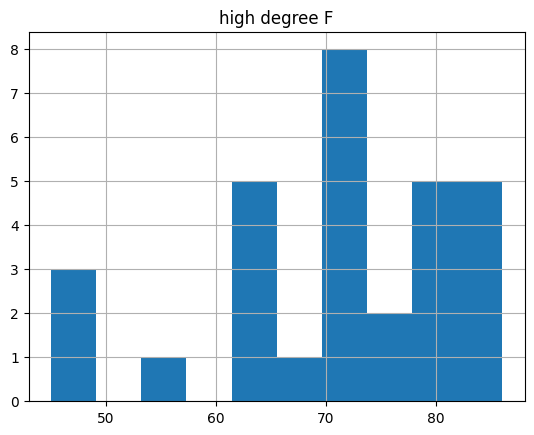

In [48]:

df.hist(column='high degree F')

Adding axis labels, title, gridlines, limits, etc using Matplotlib a better looking histogram results

(0.0, 10.0)

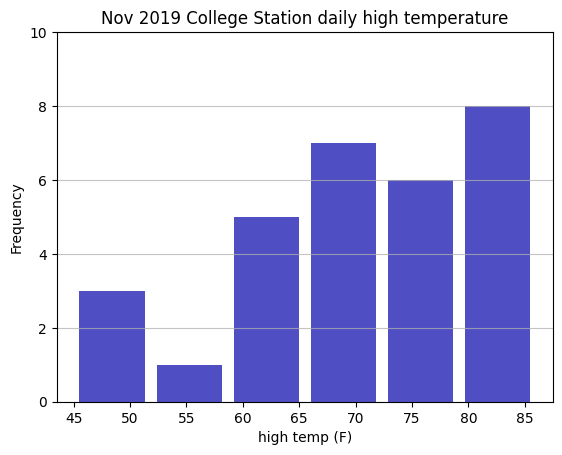

In [49]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = pyplot.hist(x=df['high degree F'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
pyplot.grid(axis='y', alpha=0.75)
pyplot.xlabel('high temp (F)')
pyplot.ylabel('Frequency')
pyplot.title('Nov 2019 College Station daily high temperature')
maxfreq = n.max()
# Set a clean upper y-axis limit.
pyplot.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

If we want more bins for the histogram adjust the number of bins (6 to 16 is considered best practice). Insert the code after this cell to creat a 16 bin histogram of the daily high temperature:

(0.0, 10.0)

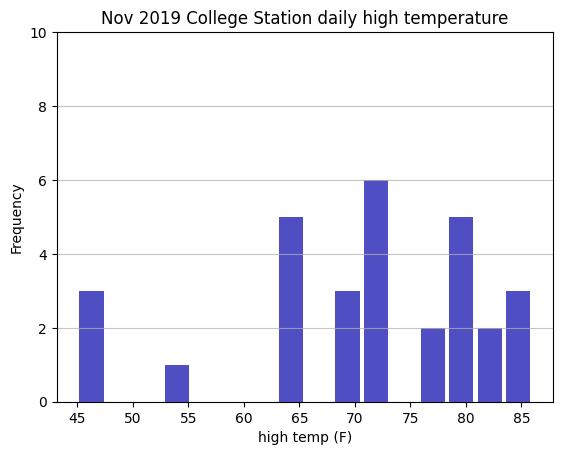

In [50]:
n, bins, patches = pyplot.hist(x=df['high degree F'], bins=16, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
pyplot.grid(axis='y', alpha=0.75)
pyplot.xlabel('high temp (F)')
pyplot.ylabel('Frequency')
pyplot.title('Nov 2019 College Station daily high temperature')
maxfreq = n.max()
# Set a clean upper y-axis limit.
pyplot.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

Measures of Central Tendancy

Mean, median, mode can all be computed on the dataframe columns. Pandas has a method for mean(), median(), and mode() for datframes.  Let's find the means of the daily high temperature:

In [51]:
print("mean:", df['high degree F'].mean())

mean: 70.77


OR we could find the mean of all features:

In [52]:
df.mean()

,0
Day,2019-11-15 12:00:00
high degree F,70.77
low degree F,46.933333
Precip inch,0.043
Snow inch,0.0
snow depth inch,0.0


Insert cells to find the median of the high temperature and the mode of the high temperature.

In [54]:
print(f"median: {df['high degree F'].median()}")
print(f"mode: {df['high degree F'].mode()}")

median: 71.55
mode: 0    71.1
1    80.1
Name: high degree F, dtype: float64


Now insert a cell to show the medians of all the features in df

In [55]:
df.median()

,0
Day,2019-11-15 12:00:00
high degree F,71.55
low degree F,45.5
Precip inch,0.0
Snow inch,0.0
snow depth inch,0.0


For Geometric means use the stat library in scipy (note: geometric mean is not suited for mean temperature)


In [56]:
from scipy.stats.mstats import gmean
gmean(df['high degree F'])

np.float64(69.74812411914887)

Likewise harmonic mean (also not relevant)

In [57]:
from scipy.stats.mstats import hmean
hmean(df['high degree F'])

np.float64(68.58880347621499)

Moving on to Measures of Dispersion or Variation

First, for range we can use numpy "peak to peak" function ptp() to compute ranges. Alternatively, we could in Pandas use df.max() and df.min() and a little math would give the same result,

In [58]:
np.ptp(df['high degree F'])

np.float64(41.0)

Next use df.var() to compute variance.  You adjust variance for population vs sample by using the ddof (delta degrees of freedom) parameter.

In [59]:
# sample variance
df['high degree F'].var()

131.80493103448276

In [60]:
#population variance
df['high degree F'].var(ddof=0)

127.41143333333335

For standard deviation, the code is similar

In [61]:
# sample standard deviation
df['high degree F'].std()

11.480632867332826

In [62]:
#popuation standard variation
df['high degree F'].std(ddof=0)

11.287667311421494

Ranking.  Percent rank uses df.rank(). First lets see the high temperatures for the month

In [63]:
df['high degree F']

,high degree F
0,63.0
1,71.1
2,73.0
3,80.1
4,84.9
5,84.9
6,70.0
7,54.0
8,69.1
9,77.0


Now for each of those readings, rank shows the percentile rank of that value.

In [64]:
df['high degree F'].rank(pct=True)

,high degree F
0,0.183333
1,0.466667
2,0.583333
3,0.800000
4,0.950000
5,0.950000
6,0.383333
7,0.133333
8,0.333333
9,0.666667


Now quantile rank to get data quartiles.

In [65]:
pd.qcut(df['low degree F'], q=4)


,low degree F
0,"(27.999, 39.225]"
1,"(27.999, 39.225]"
2,"(39.225, 45.5]"
3,"(45.5, 53.775]"
4,"(53.775, 70.0]"
5,"(53.775, 70.0]"
6,"(45.5, 53.775]"
7,"(39.225, 45.5]"
8,"(39.225, 45.5]"
9,"(39.225, 45.5]"


Finally, a summary of the characteristics of the dataframe which includes many of the statistics can be displayed by using describe()

In [66]:
df.describe()

,Day,high degree F,low degree F,Precip inch,Snow inch,snow depth inch
count,30,30.000000,30.000000,30.000000,30.0,30.0
mean,2019-11-15 12:00:00,70.770000,46.933333,0.043000,0.0,0.0
min,2019-11-01 00:00:00,45.000000,28.000000,0.000000,0.0,0.0
25%,2019-11-08 06:00:00,64.225000,39.225000,0.000000,0.0,0.0
50%,2019-11-15 12:00:00,71.550000,45.500000,0.000000,0.0,0.0
75%,2019-11-22 18:00:00,79.825000,53.775000,0.017500,0.0,0.0
max,2019-11-30 00:00:00,86.000000,70.000000,0.620000,0.0,0.0
std,NaN,11.480633,11.223784,0.118457,0.0,0.0


More sophisticated distribution analysis and ploting can be done with the Dataframe data and Matplotlib. For example to compare high and low temperature distributionshistograms (and Gaussian Kernel Density Estimates as distribution model) we can use this plot:

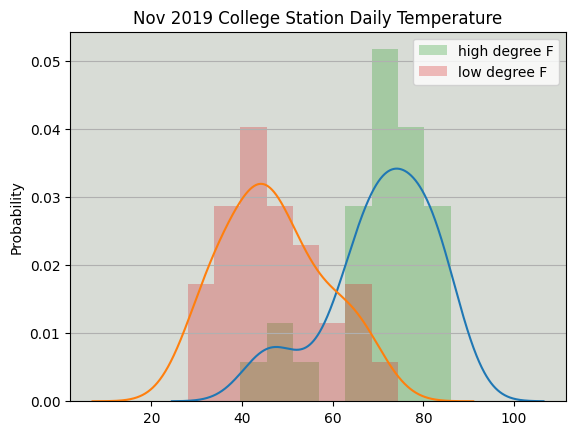

In [67]:

fig, ax = pyplot.subplots()
df[["high degree F", "low degree F"]].plot.kde(ax=ax, legend=False, title='Nov 2019 College Station Daily Temperature')
df[["high degree F", "low degree F"]].plot.hist(density=True, ax=ax, alpha=0.3)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')






PART 2: Loading and Cleaning Leaf Blower Data

In [108]:
# change the directory as needed
!ls drive/MyDrive/ECEN250_Lab2_LeafBlowers.csv

drive/MyDrive/ECEN250_Lab2_LeafBlowers.csv


In [109]:
# importing dataset
df = pd.read_csv('drive/MyDrive/ECEN250_Lab2_LeafBlowers.csv')


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manuf         100 non-null    object 
 1   model         100 non-null    object 
 2   retail        100 non-null    object 
 3   volt          100 non-null    float64
 4   no batteries  100 non-null    float64
 5   bat Ahr       100 non-null    float64
 6   bat lb        100 non-null    float64
 7   motor type    100 non-null    object 
 8   sound rating  98 non-null     float64
 9   hi cfm        100 non-null    float64
 10  lo cfm        100 non-null    float64
 11  hi mph        100 non-null    float64
 12  lo mph        99 non-null     float64
 13  weight        100 non-null    float64
 14  price         100 non-null    float64
 15  source        100 non-null    object 
dtypes: float64(11), object(5)
memory usage: 14.1+ KB


Let's look at what we read in to make sure it's what we expected:

In [111]:
df.head(10)

,manuf,model,retail,volt,no batteries,bat Ahr,bat lb,motor type,sound rating,hi cfm,lo cfm,hi mph,lo mph,weight,price,source
0,Black+Decker,LSW221,Tractor Supply Co,20.0,1.0,1.5,0.90,brushed,61.0,100.0,100.0,130.0,130.0,3.70,99.99,https://www.tractorsupply.com/tsc/product/blac...
1,Black+Decker,LSW321,Tractor Supply Co,20.0,1.0,2.0,0.90,brushed,54.0,100.0,100.0,130.0,130.0,3.70,119.99,https://www.tractorsupply.com/tsc/product/blac...
2,Black+Decker,LSW321,Walmart,20.0,1.0,2.0,0.90,brushed,54.0,100.0,100.0,130.0,130.0,3.70,128.00,https://www.walmart.com/ip/BLACK-DECKER-20V-MA...
3,Black+Decker,LSW40C,Home Depot,40.0,1.0,1.5,1.90,unspecified,59.0,90.0,90.0,125.0,125.0,6.00,129.00,https://www.homedepot.com/p/BLACK-DECKER-40V-M...
4,Black+Decker,LSWV36,Home Depot,40.0,1.0,1.5,1.90,unspecified,65.0,90.0,90.0,120.0,120.0,6.90,168.00,https://www.homedepot.com/p/BLACK-DECKER-40V-M...
5,Craftsman,CMCBL710M1,Lowes,20.0,1.0,4.0,0.77,brushed,92.0,200.0,200.0,90.0,90.0,5.05,89.98,CRAFTSMAN 20-volt Max 200-CFM 90-MPH Battery H...
6,Craftsman,CMCBL730P1,Lowes,20.0,1.0,5.0,2.60,brushless,63.0,410.0,410.0,110.0,110.0,6.50,129.00,https://www.lowes.com/pd/CRAFTSMAN/5013848049
7,Dewalt,DCBL722BDCB246K,Home Depot,20.0,2.0,6.0,1.80,brushless,61.0,450.0,450.0,125.0,125.0,6.30,348.00,https://www.homedepot.com/p/DEWALT-20V-MAX-125...
8,Dewalt,DCBL722P1,Home Depot,20.0,1.0,5.0,1.40,brushless,62.0,450.0,450.0,125.0,125.0,6.70,199.00,DEWALT 20V MAX 125 Mph 450 CFM Brushless Cordl...
9,Dewalt,DCBL770X1,Home Depot,60.0,1.0,3.0,2.70,brushless,67.0,423.0,423.0,129.0,129.0,10.10,319.00,https://www.homedepot.com/p/DEWALT-60V-MAX-129...


Manufacturer, model, retail, and source are going to be non-numeric by nature. These are currently objects, because some entries may be numeric and some string. We will leave them as they are since they will not be used in our statistics or ML data analysis. The feature motor type contains strings: brushed, brushless, or unspecified. It is currently an object datatype. This feature -- is categorical.  Is it nominal or ordinal?? We will use it a lot in
our analysis so let's turn it into a numerical that we can manipulate. We can do that with the following python cell (notice when we use flag inplace=True we are directly modifying our df -- if not done inplace replace() returns a new modified df):

In [112]:
df['motor type'].replace(['brushless', 'unspecified', 'brushed'],
                        [0, 0.5, 1], inplace=True)

/tmp/ipython-input-885561029.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['motor type'].replace(['brushless', 'unspecified', 'brushed'],
/tmp/ipython-input-885561029.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['motor type'].replace(['brushless', 'unspecified', 'brushed'],


Let's verify this worked by doing df.head(10) again

In [113]:
df.head(10)

,manuf,model,retail,volt,no batteries,bat Ahr,bat lb,motor type,sound rating,hi cfm,lo cfm,hi mph,lo mph,weight,price,source
0,Black+Decker,LSW221,Tractor Supply Co,20.0,1.0,1.5,0.90,1.0,61.0,100.0,100.0,130.0,130.0,3.70,99.99,https://www.tractorsupply.com/tsc/product/blac...
1,Black+Decker,LSW321,Tractor Supply Co,20.0,1.0,2.0,0.90,1.0,54.0,100.0,100.0,130.0,130.0,3.70,119.99,https://www.tractorsupply.com/tsc/product/blac...
2,Black+Decker,LSW321,Walmart,20.0,1.0,2.0,0.90,1.0,54.0,100.0,100.0,130.0,130.0,3.70,128.00,https://www.walmart.com/ip/BLACK-DECKER-20V-MA...
3,Black+Decker,LSW40C,Home Depot,40.0,1.0,1.5,1.90,0.5,59.0,90.0,90.0,125.0,125.0,6.00,129.00,https://www.homedepot.com/p/BLACK-DECKER-40V-M...
4,Black+Decker,LSWV36,Home Depot,40.0,1.0,1.5,1.90,0.5,65.0,90.0,90.0,120.0,120.0,6.90,168.00,https://www.homedepot.com/p/BLACK-DECKER-40V-M...
5,Craftsman,CMCBL710M1,Lowes,20.0,1.0,4.0,0.77,1.0,92.0,200.0,200.0,90.0,90.0,5.05,89.98,CRAFTSMAN 20-volt Max 200-CFM 90-MPH Battery H...
6,Craftsman,CMCBL730P1,Lowes,20.0,1.0,5.0,2.60,0.0,63.0,410.0,410.0,110.0,110.0,6.50,129.00,https://www.lowes.com/pd/CRAFTSMAN/5013848049
7,Dewalt,DCBL722BDCB246K,Home Depot,20.0,2.0,6.0,1.80,0.0,61.0,450.0,450.0,125.0,125.0,6.30,348.00,https://www.homedepot.com/p/DEWALT-20V-MAX-125...
8,Dewalt,DCBL722P1,Home Depot,20.0,1.0,5.0,1.40,0.0,62.0,450.0,450.0,125.0,125.0,6.70,199.00,DEWALT 20V MAX 125 Mph 450 CFM Brushless Cordl...
9,Dewalt,DCBL770X1,Home Depot,60.0,1.0,3.0,2.70,0.0,67.0,423.0,423.0,129.0,129.0,10.10,319.00,https://www.homedepot.com/p/DEWALT-60V-MAX-129...


To make sure it it indeed now numeric, let's do df.info() again:

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manuf         100 non-null    object 
 1   model         100 non-null    object 
 2   retail        100 non-null    object 
 3   volt          100 non-null    float64
 4   no batteries  100 non-null    float64
 5   bat Ahr       100 non-null    float64
 6   bat lb        100 non-null    float64
 7   motor type    100 non-null    float64
 8   sound rating  98 non-null     float64
 9   hi cfm        100 non-null    float64
 10  lo cfm        100 non-null    float64
 11  hi mph        100 non-null    float64
 12  lo mph        99 non-null     float64
 13  weight        100 non-null    float64
 14  price         100 non-null    float64
 15  source        100 non-null    object 
dtypes: float64(12), object(4)
memory usage: 14.1+ KB


Good, so now everything we will use today is numeric!

If for some reason this didn't work -- or you decided that you want to just make them categorical for now and numeric later, go back to the cell that imports the csv file.  Re-execute that cell and all the cells up to the one you are changing.  THIS IS WHY WE DON'T MODIFY OUR CSV SOURCE FILE!

Take another look at the results of the df.info() above -- the non-null counts will differ if you have some csv rows where you have not filled in each field.  In the dataframe those entries will be NaN. Our statistics and modeling will be messed up by those NaN values. If you do not have 50 entries in which all
features have a value, you need to stop now and find a few more to add to your csv.  Then restart the runtime and rerun your notebook to here.

If you have NaNs in your dataframe you can use the techniques you learned earlier to fix them here:

Use df.info() to verify no remaining NaNs

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manuf         100 non-null    object 
 1   model         100 non-null    object 
 2   retail        100 non-null    object 
 3   volt          100 non-null    float64
 4   no batteries  100 non-null    float64
 5   bat Ahr       100 non-null    float64
 6   bat lb        100 non-null    float64
 7   motor type    100 non-null    float64
 8   sound rating  98 non-null     float64
 9   hi cfm        100 non-null    float64
 10  lo cfm        100 non-null    float64
 11  hi mph        100 non-null    float64
 12  lo mph        99 non-null     float64
 13  weight        100 non-null    float64
 14  price         100 non-null    float64
 15  source        100 non-null    object 
dtypes: float64(12), object(4)
memory usage: 14.1+ KB


We are almost done --- we first should write out the data from our dataframe since we will use this cleaned data for Lab 3.  To do that you can write out your data into a CSV.  The flag index=False prevents the Index values (column 0) from being written to the csv.  We do this because read_csv by default assigns index values as the data is being read from the csv file.

In [116]:
df.to_csv('drive/MyDrive/ECEN250_Lab2_LeafBlowersClean.csv', index=False)

Now make sure that this notebook shows all your executed cells.  If it does not, you can restart the runtime and runall or you can restart the runtime and individually reexecute all of your cells.

Now download your notebook as both an ipynb file (use a name that includes your name please) and a PDF file (to create the PDF in Colab, go to File > Print and select Save as PDF), and upload both files to Canvas for your submission for Lab 2.